In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
Crime=pd.read_csv('/content/crime_data.csv')
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [16]:
Crime = Crime.rename(columns={'Unnamed: 0': 'City'})
Crime

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [17]:
Crime.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [18]:
Crime_x=Crime.iloc[:,1:]
Crime_x

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [19]:
Crime_x.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

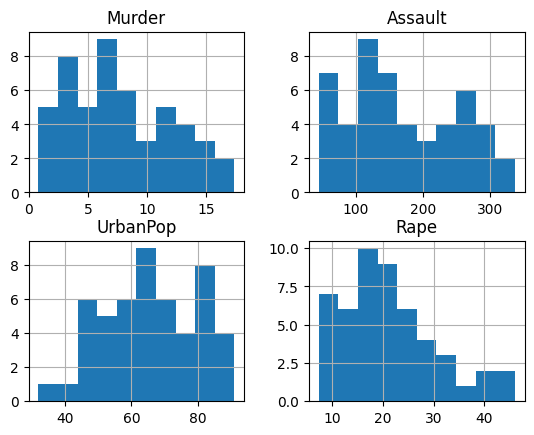

In [20]:
#Histogram
Crime_x.hist()

<function matplotlib.pyplot.show(close=None, block=None)>

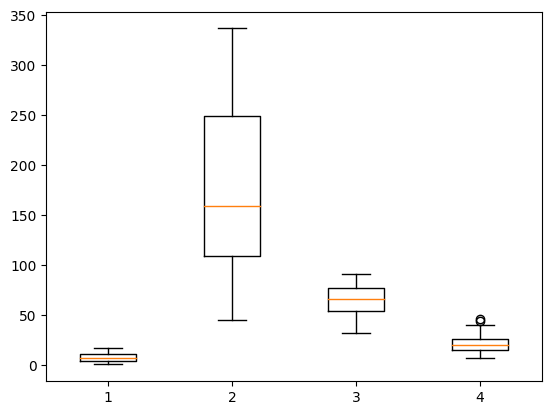

In [21]:
#boxplot
plt.boxplot(Crime_x)
plt.show  #Crime in Rapes data having outliers.

<Axes: >

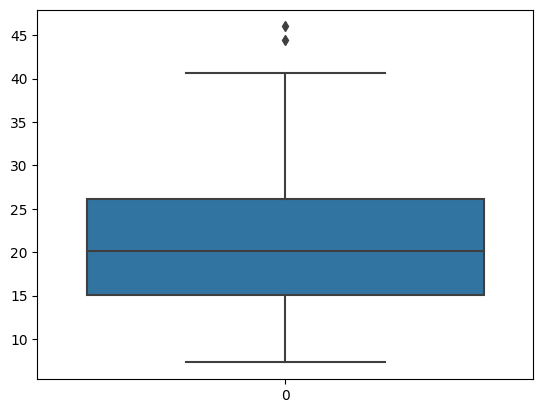

In [22]:
#I want to check only Crimes in Rapes boxplot for easily understanding of given data
sns.boxplot(Crime_x['Rape'])

In [23]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
from sklearn.preprocessing import StandardScaler
Crime_X=StandardScaler().fit_transform(Crime_x)
Crime_X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

### **Model Building**

Data proximity using nearest neighbours

In [24]:
from sklearn.cluster import DBSCAN
DB=DBSCAN()
DB.fit_predict(Crime_X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [25]:
DB2=DBSCAN(eps=1.5,min_samples=14)
DB2.fit_predict(Crime_X)  #-1 are Outliers o are Normal data

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1, -1,
        0,  0,  0,  0, -1, -1,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0])

In [26]:
DB2.labels_

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1, -1,
        0,  0,  0,  0, -1, -1,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0])

In [27]:
#Check Which model is goog with EPS=1 or 2 using silhautte score
from sklearn.metrics import silhouette_score


In [28]:
silhouette_score(Crime_x,DB2.fit_predict(Crime_X))  # 0.4494 is silhouette value its nearby 1 ..its shows moderate model

0.44939786945823706

In [29]:
# Adding clusters to dataset
Crime_x['clusters']=DB2.labels_
Crime_x

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [30]:
Crime_x.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,10.833333,238.380952,66.761905,26.428571
1,0,5.582759,121.793103,64.655172,17.468966


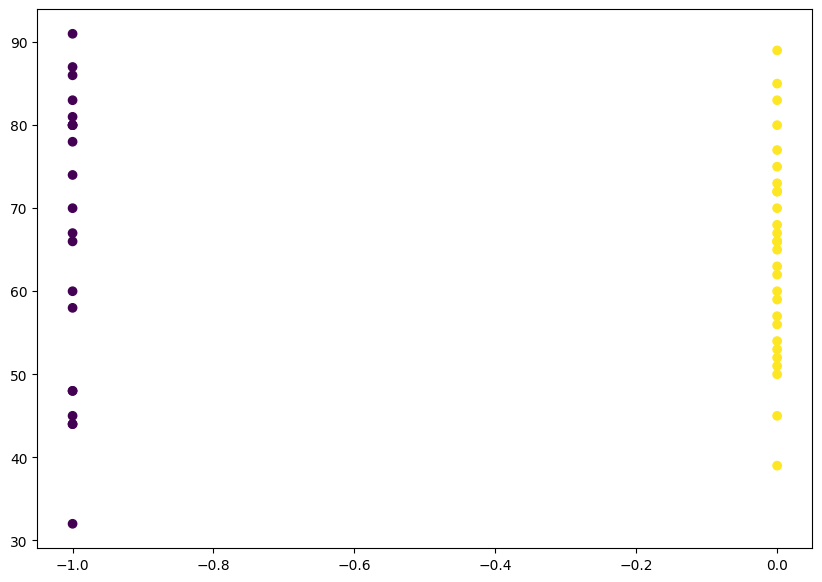

In [31]:
# Plot Clusters
plt.figure(figsize=(10, 7))
plt.scatter(Crime_x['clusters'],Crime_x['UrbanPop'], c=DB2.labels_)

In [32]:
features = Crime[['Murder', 'Assault', 'UrbanPop', 'Rape']]

In [33]:
city_labels = Crime['City'].tolist()

In [34]:
linkage_matrix = linkage(features, method='ward')

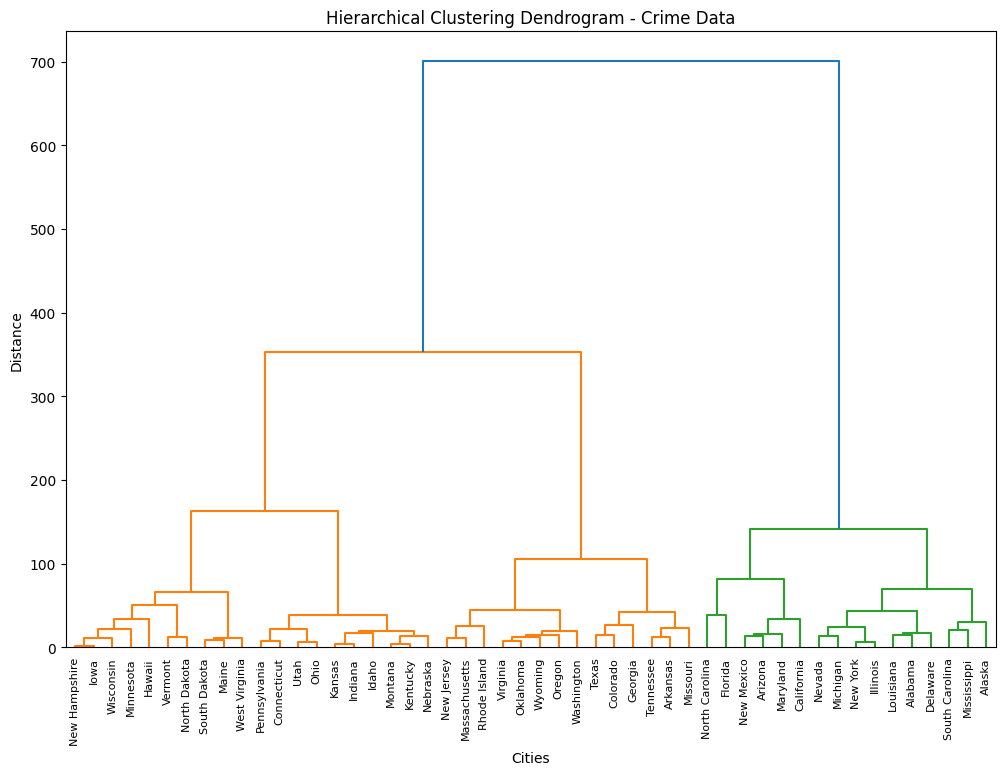

In [35]:
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=city_labels, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram - Crime Data')
plt.xlabel('Cities')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()